#  <font color = 545AA7> Introduction to PDB Files and Biopython </font>

For this activity, we will exam the structures of proteins in **PDB (Protein Data Bank) files** using the **biopython** library. The goals of this activity are listed below:

- Examine the structure of a PDB file
- Download a PDB file from the Protein Data Bank
- Use biopython to load PDB files and extract information

##  <font color = 545AA7> 1. Download a PDB File </font>

To  download a PDB file, go to the Protein Data Bank website at [https://www.rcsb.org/](https://www.rcsb.org/) and <font color = F28500> download the data on a protein of your choice in the PDB Format </font>. If you can't decide on a protein, go ahead and pick their latest entry (bottom left of webpage). Move this downloaded file into the **02 Biopython** folder with this Jupyter notebook.

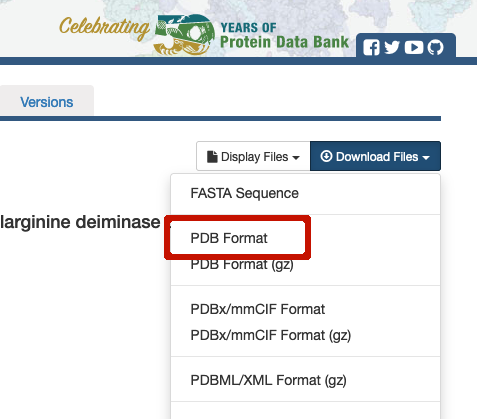

In [19]:
from IPython.display import Image
Image("download_PDB.png", width=400)

##  <font color = 545AA7> 2. PDB Format and Parsing </font>

While some other bioinformatics file formats online include mainly sequence data, the PDB file format provides an assortmet of information including:

- amino acid sequence
- non-amino acid species
- xyz coordinates of atoms indentified in structure (does not typically include hydrogens)
- metadata about the protein (e.g., host specie and protein class)
- information about secondary structures

PDB files are text files with the data arranged with specific labels and seperated by strictly-delineated *position* in a line in the file. For more information on PDB file formats, see [https://www.cgl.ucsf.edu/chimera/docs/UsersGuide/tutorials/pdbintro.html](https://www.cgl.ucsf.edu/chimera/docs/UsersGuide/tutorials/pdbintro.html).

There are multiple ways of **parsing** data (i.e., seperating data into pieces) from the PDB files. In this activity, we will use the biopython library's PDB reading capabilities. First, we need to import the **PDB module** of the biopython library with the `import Bio.PDB` import command.

#### <font color = F28500> Be sure to run the following code cell. </font>

In [20]:
import Bio.PDB

To parse the PDB file, we first create a **parser object** using the `Bio.PDB.PDBParser()` function. Like previous functions, we need to include the name of the library/module it is in, so in this case, `Bio.PDB.PDBParser()` means the `PDBParser()` function in the `PDB` module of the `Bio` (biopython) library. Think of this like a directory system of nested folders on your computer (e.g., /User/Documents/Python_Projects).

We will also want to attach our parser object to a variable using the `=` symbol the same way we attach a number to a variable. Run the following code in a code cell.

`parser = Bio.PDB.PDBParser()`

In [21]:
parser = Bio.PDB.PDBParser()

Let's now use the `PDBParser().get_structure()` function to parse a single PDB. By default, <u> any code run in a Jupyter notebook will look in the same directory (i.e., folder) as the Jupyter notebook for the file </u>. We will use the `get_structure()` function as follows. This function requires two inputs: the first is some name you provide in quotes (singel or double) followed by the full name of the file in quotes.

`parser.get_structure('name', 'file_name.pdb')`

In [22]:
structure = parser.get_structure('6x8j', '6x8j.pdb')

/Users/cweiss/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4378.
  warnings.warn(
/Users/cweiss/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4397.
  warnings.warn(
/Users/cweiss/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4407.
  warnings.warn(
/Users/cweiss/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4416.
  warnings.warn(


##  <font color = 545AA7> 3. Metadata </font>

The data is now attached to the `structure` variable. This includes both the structural data about the protein and **metadata** which is data about the data. For example, we can extract the **keywords** about the protein using `structure.header[<key>]` where <key> is the specific information you are looking for. For example, if you want the keywords from the header, you can insert `keywords`. Give it a try.
    
`structure.header['keywords']`    

In [23]:
structure.header['keywords']

'inhibitor, tetrahedral, complex, hydrolase-hydrolase inhibitor complex'

<font color = F28500> To see what other metadata is available, try typing `structure.header[]` in a code cell, place the cursor inside the `[]` brackets, and type the **Tab** key. A dialogue box will apear showing you all the options avialable. </font>

In [24]:
structure.header['journal']

'AUTH   A.SOLANIA,J.H.XU,D.W.WOLANTITL   CASPASE-7 IN COMPLEX WITH KETOMETHYLENE INHIBITOR REVEALSTITL 2 TETRAHEDRAL ADDUCTREF    TO BE PUBLISHEDREFN'

##  <font color = 545AA7> 4. Examining the Data </font>


The structural data extracted from the PDB by biopython is organized in a heierarchy starting with the **structure** $\rightarrow$ **model** $\rightarrow$ **chain** $\rightarrow$ **residue** $\rightarrow$ **atom**. The structure is the protein, the model is a particular 3D model of the protein, the chain is a single peptide chain in the protein, the residue is an amino acid residue in the chain, and the atom is each atom within a given chain. 

| Level    |    Description      |
|:----------:|:---------------------|
|Structure   | Protein strucutre; may contain multiple models     |
|Model       | Particular 3D model of the protein  |
|Chain       | Each pepetide chain in the protein  |
|Residue     | Amino acid residue in a given chain |
|Atom        | Atoms in a particular peptide chain |

While PDB files can contain multiple structures of a protein, most only contain one. Even though there is only one model in our data, we will need to access the first (and only) model using indexing. In square brackets `[]` behind the variable, give the number of the item you want to access. In Python indexing, numbering starts with zero, so the first protein model is `structure[0]`. If there were a second, it would be `structure[1]`.

<font color = F28500> Assigne the first model in the structure and attach your model to a variable for later use. You will want to select an intuative variable name. Let's go with `protein_model`. </font>

In [25]:
protein_model = structure[0]

Next, we will examine the chains in the protein model. Proteins can have single peptide chain but often contain multiple chains. Use the Python `len()` length function to see how many chains are contained in 

In [26]:
len(protein_model)

6

Alternatively, a `for` loop can run through your protein model to see how many chains are in it. The code below systematically goes through ever chain in the `protein_model`, assigns in to the variable `chain`, and then prints (i.e., displays on the screen) the information.

In [27]:
for chain in protein_model:
    print(chain)

<Chain id=A>
<Chain id=C>
<Chain id=B>
<Chain id=D>
<Chain id=E>
<Chain id=F>


To access a particular chain, use the chain's `id`. For example, to access Chain A, type `protein_model['A']`. <font color = F28500> Select the first chain and attach its information to an intuative variable of your choice. </font>

In [28]:
chain_A = protein_model['A']

Next, go ahead and create a `for` loop to iterate through your chain to see what residues it contains.

`for residue in <chain>:
     print(residue)`

You can access a specific amino acid residue using the residue number in square brackets like below. <font color = F28500> Try accessing residue 58 and attach it to a variable.

`chain_A[#]`

In [29]:
chain_A[58]

<Residue TYR het=  resseq=58 icode= >

In [30]:
res58 = chain_A[58]

We can learn about the residue using a series of functions (known as **methods**) for the residue. A list of a few is included below. You can learn about others by placing the curor behind the residue variable and pressing `Tab`.


| Method    |    Description      |
|:----------:|:---------------------|
|`res.get_resname()`   | Returns amino acid three-letter code     |
|`res.get_unpacked_list()`| Returns list of **atoms** in residue |
|`res.get_parent()`       | Returns parent chain name  |

For example, if we want the name of the first residue of chain A that is attached to the `res58` variable, we can use the following code.

`res58.get_resname()`

<font color = F28500> Give this a try and also look at the list of atoms in the residue using one of the above methods. </font>

We can learn about the specific atoms in a residue. To access an atom in a residue, place the atom name in square brackets `[]`. Each amino acid residue contains a nitrogen (`'N'`), $\alpha$-carbon (`'CA'`), carbonyl carbon (`'C'`), and carbnyl oxygen (`'O'`). Some amino acids contain other non-hydrogen atoms whose name can be found using the `res.get_unpacked_list()` method described previously.  

For example, to access the $\alpha$-carbon in our amino acid residue, type `res['CA']`. Give this a try below.

In [31]:
res58['CA']

<Atom CA>

Additional information about each atom can be found using the following functions.

| Method    |    Description      |
|:----------:|:---------------------|
|`atom.get_coord()`   |  Returns atom 3D xyx coordinates  |
|`atom.get_vector()`  |  Returns atoms #D xyz coordinates as a vector object  |
|`atom.get_name()`| Returns atom name (e.g, 'C' |
|`atom.get_charge()` | Returns atom charge (if applicable)  |
|`atom.get_parent()`       | Returns parent residue information  |


For example, to obtain the 3D x,y,z coordinates of the $\alpha$-carbon, type `res['CA'].get_coord()` 

<font color = F28500> Use the functions above to obtain the name and xyz coordinates for the nitrogen atom of your amino acid residue. </font>

In [32]:
res58['CA'].get_coord()

array([-8.509, 49.716,  8.659], dtype=float32)

In [33]:
res58['CA'].get_name()

'CA'

In [34]:
res58['N'].get_parent()

<Residue TYR het=  resseq=58 icode= >

To calculation the distance between atoms, perform a substraction to turn the distance in angstroms. Below is the calculation for finding the distance between the  $\alpha$-carbon and the carbonyl carbon.

`res['CA'] - res['C']`

<font color = F28500> Run the code below and then write your own code in the next cell to calculate the distance between the alpha carbon and nitrogen atom. </font>

In [35]:
res58['CA'] - res58['C']

1.5251906

##  <font color = 545AA7> 5. Examining Peptide Chains </font>


Look at and visualize the amino acid residue distribution in our protein. Below is code that you can run that iterates through the peptides and adds each amino acid residue identity to a list called `amino_acids`.

In [36]:
amino_acids = []  # empty list to add the amino acids to

parser = Bio.PDB.PDBParser()
structure = parser.get_structure('6x8j', '6x8j.pdb')
pp = Bio.PDB.PPBuilder().build_peptides(structure[0])

# go through each chain and residue and append the amino acid identity to the list
for chain in pp:
    for res in chain:
        res_name = res.get_resname()
        amino_acids.append(res_name)

/Users/cweiss/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain A is discontinuous at line 4378.
  warnings.warn(
/Users/cweiss/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain C is discontinuous at line 4397.
  warnings.warn(
/Users/cweiss/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain B is discontinuous at line 4407.
  warnings.warn(
/Users/cweiss/opt/anaconda3/lib/python3.8/site-packages/Bio/PDB/StructureBuilder.py:89: PDBConstructionWarning: WARNING: Chain D is discontinuous at line 4416.
  warnings.warn(


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 [Text(0, 0, 'THR'),
  Text(1, 0, 'TYR'),
  Text(2, 0, 'GLN'),
  Text(3, 0, 'ASN'),
  Text(4, 0, 'MET'),
  Text(5, 0, 'PHE'),
  Text(6, 0, 'GLU'),
  Text(7, 0, 'LYS'),
  Text(8, 0, 'LEU'),
  Text(9, 0, 'GLY'),
  Text(10, 0, 'CYS'),
  Text(11, 0, 'ILE'),
  Text(12, 0, 'ASP'),
  Text(13, 0, 'VAL'),
  Text(14, 0, 'ARG'),
  Text(15, 0, 'ALA'),
  Text(16, 0, 'SER'),
  Text(17, 0, 'HIS'),
  Text(18, 0, 'PRO'),
  Text(19, 0, 'TRP')])

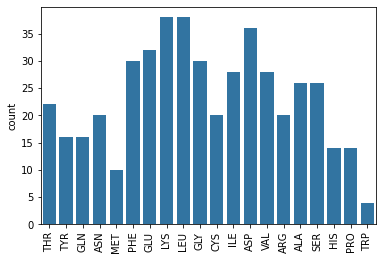

In [46]:
import seaborn as sns
sns.countplot(x=amino_acids, color='C00')
plt.xticks(rotation=90)